In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
# Step 1: Load the Data
try:
    df = pd.read_csv('weather.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: File 'weather.csv' not found.")
    exit()

Data loaded successfully!


In [6]:
# Step 2: Data Exploration
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset information:")
print(df.info())
print("\nDataset statistics:")
print(df.describe())

First 5 rows of the dataset:
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7

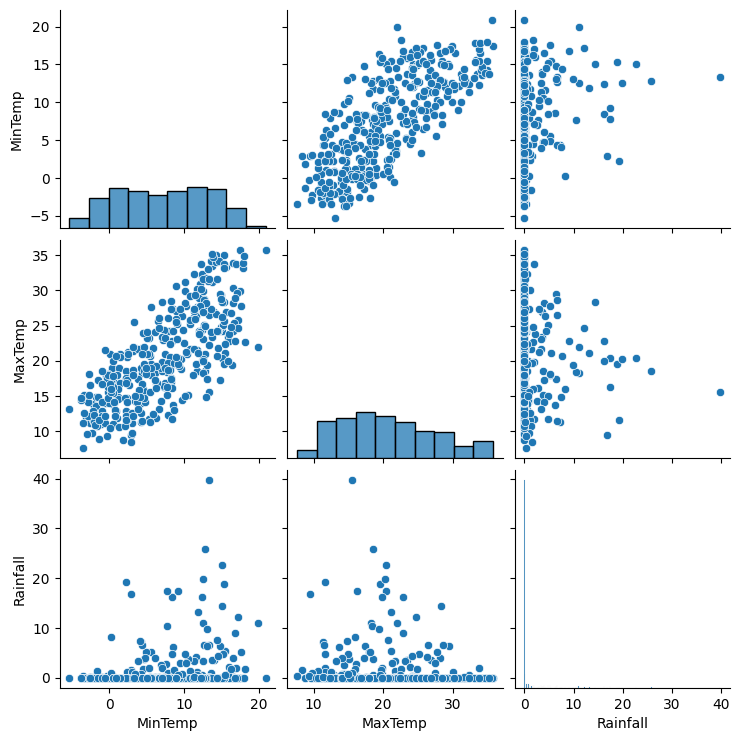

In [7]:
# Step 3: Data Visualization (initial exploration)
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

In [8]:
# Step 4: Feature Engineering
# Create a date index since we don't have a Date column
df['Date'] = pd.date_range(start='2022-01-01', periods=len(df), freq='D')
df['Month'] = df['Date'].dt.month
df['TempRange'] = df['MaxTemp'] - df['MinTemp']

In [9]:
# Handle missing values (if any)
if df.isnull().sum().any():
    print("\nWarning: Missing values found! Dropping missing rows.")
    df = df.dropna()

In [10]:
# Step 5: Data Analysis
# Example: Calculate average MaxTemp by month
monthly_avg_max_temp = df.groupby('Month')['MaxTemp'].mean()
monthly_total_rainfall = df.groupby('Month')['Rainfall'].sum()

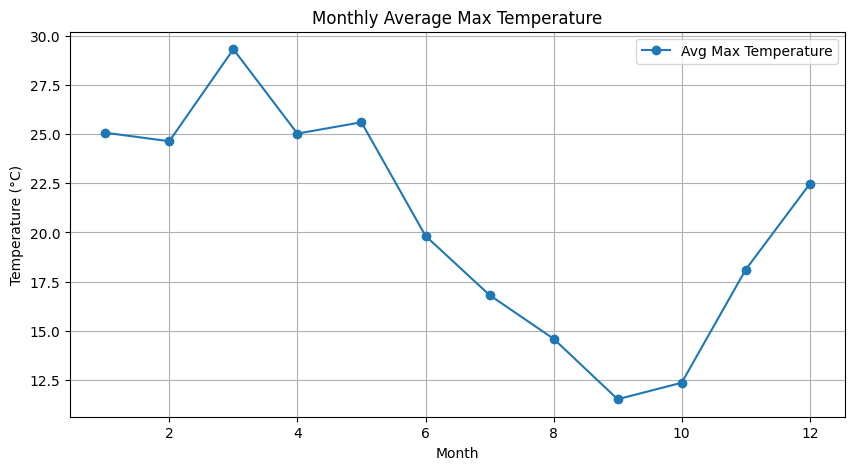

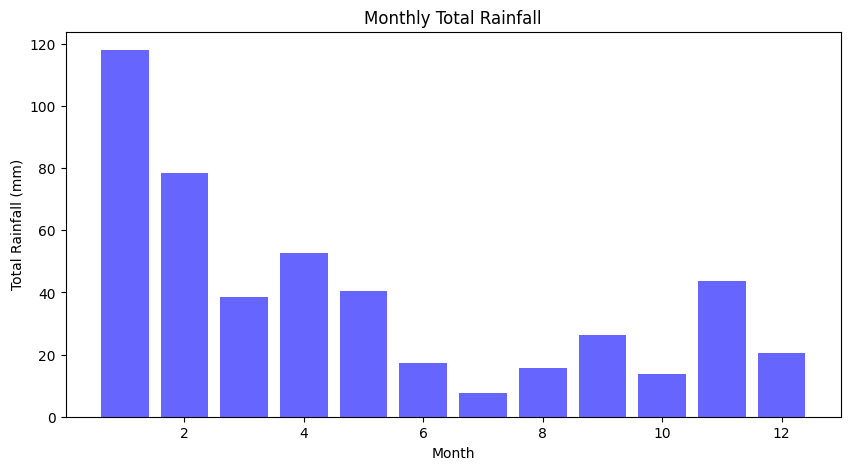

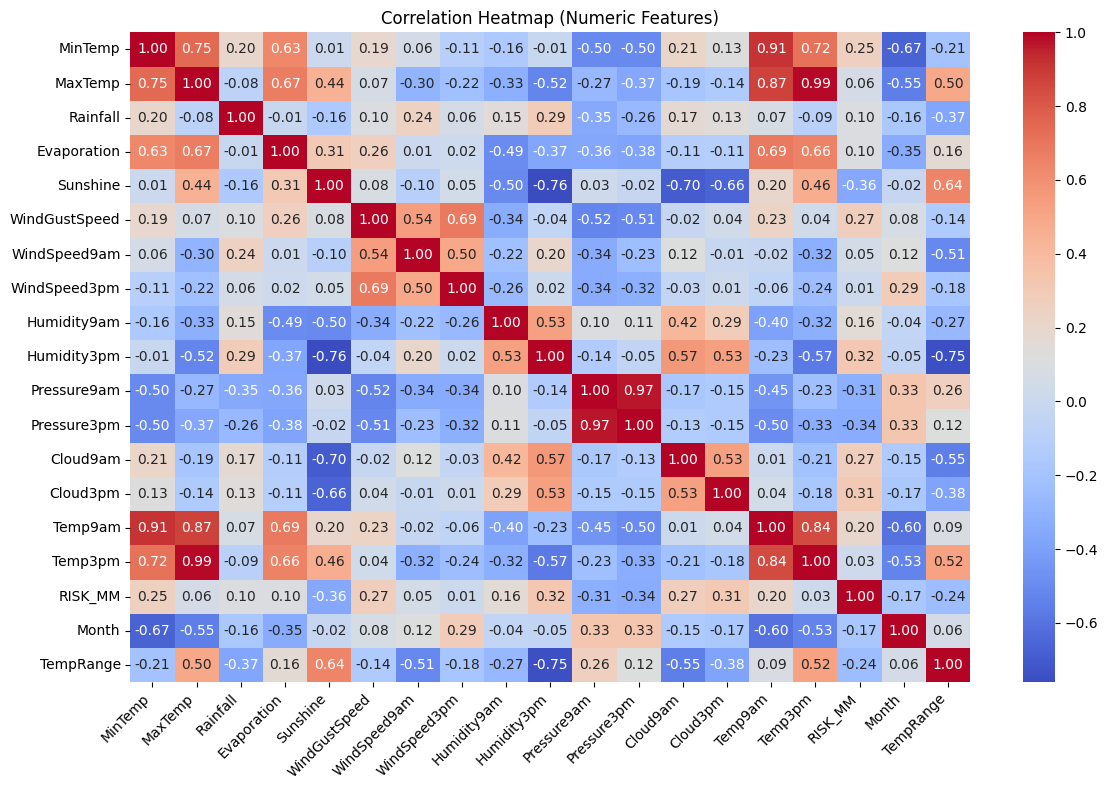

In [11]:
# Step 6: Data Visualization (Monthly Analysis)
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, marker='o', label='Avg Max Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(monthly_total_rainfall.index, monthly_total_rainfall.values, color='blue', alpha=0.6)
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.title('Monthly Total Rainfall')
plt.show()

# Additional Visualization: Correlation Heatmap
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int32', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Features)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [12]:
# Step 7: Predict Rainfall Using Linear Regression
# Prepare the data
X = df[['MinTemp', 'MaxTemp', 'TempRange']]
y = df['Rainfall']


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'\nMean Squared Error for Rainfall Prediction: {mse:.2f}')


Mean Squared Error for Rainfall Prediction: 31.64


In [16]:
# Step 8: Insights
highest_rainfall_month = monthly_total_rainfall.idxmax()
lowest_rainfall_month = monthly_total_rainfall.idxmin()
print(f'\nHighest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')


Highest rainfall month: 1, Lowest rainfall month: 7


In [17]:
# Step 9: Communication
# Save monthly analysis to CSV
monthly_analysis = pd.DataFrame({
    'Average Max Temperature': monthly_avg_max_temp,
    'Total Rainfall': monthly_total_rainfall
})
monthly_analysis.to_csv('monthly_weather_analysis.csv', index=True)
print("Monthly analysis saved to 'monthly_weather_analysis.csv'.")    

Monthly analysis saved to 'monthly_weather_analysis.csv'.


In [18]:
# Save insights to a text file
with open('weather_insights.txt', 'w') as file:
    file.write("Weather Insights:\n")
    file.write(f"Mean Squared Error for Rainfall Prediction: {mse:.2f}\n")
    file.write(f"Highest rainfall month: {highest_rainfall_month}\n")
    file.write(f"Lowest rainfall month: {lowest_rainfall_month}\n")
    print("Weather insights saved to 'weather_insights.txt'.")

Weather insights saved to 'weather_insights.txt'.
